## <p style="text-align: right;"> &#9989; Patrick Wilusz: patrickw03</p>

# CMSE 202 Final (Section 002 - Spring 2025) (80 points total)

The goal of this final is to give you the opportunity to test out some of the skills that you've developed having now finished CMSE 202. In particular, you'll be committing and pushing repository changes to a GitHub repository, working with data to build a network graph, performing regression analysis, and classifying data using a machine learning classifier. You should find that you have all of the skills necessary to complete this exam having completed the second half of CMSE 202!

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam. Once you've read through it, you'll probably want to make sure you do Part 1 first to ensure that your GitHub repository is working correctly. Let your instructor know right away if you run into issues!

**Important note about using online resources**: This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. You can also use _your version_ of past CMSE 202 assignments and the CMSE 202 course materials as a resource! **However: The use of any person-to-person communication software or is absolutely not acceptable.** If you are seen accessing your email, using a collaborative cloud storage or document software (e.g. Slack, Google Documents) you will be at risk for receiving a zero on the exam. Regardless of what resources you use whether they are ai or stackexchange, CITE THEM PLEASE. You will get marked down if you provide a response that looks copy and pasted without a citation. If you are unsure of how to do a citation or if your citation is good enough, ask your professor or instructional staff for help.

**Keep your eyes on your screen!** Unfortunately, there isn't enough space in the room for everyone to sit at their own table so please do your best to keep your eyes on your own screen. This exam is designed to give *you* the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. If any of the instructors observe suspicious behavior, you will, again, risk receiving a zero.

<hr style="border:2px solid gray">

## Part 0: Academic integrity statement

Read the following statement and edit the markdown text to put your name in the statement. This is your commitment to doing your own authentic work on this exam.

> I, **Patrick Wilusz**, affirm that this exam represents my own authetic work, without the use of any unpermitted aids or resources or person-to-person communication. I understand that this exam an an opportunity to showcase my own progress in developing and improving my computational skills and have done my best to demonstrate those skills.

<hr style="border:2px solid gray">

## Part 1: Add to your Git repository to track your progress on your exam (7 points)

Before you get to far along in the exam, you're going to add it to the `cmse202-s25-turnin` repository you created in class so that you can track your progress on the exam and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s25-turnin` repository and create a new directory called `final`. You may have already done this in the midterm. If you have, then good job move on to the next part!
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" respository (you should have done this previously).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s25-turnin`" repository inside the `final` directory that you just created. Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

&#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

``` bash
git add CMSE202-Final-SS25-Section001-STUDENT.ipynb

git commit -m "Adding final to git hub."   

git push
```

<hr style="border:2px solid gray">

## Part 2: Graph Theory and Networks (7 points)

&#9989; **Question 2.1 (9 points)**: We want you to make a very basic model of the personal network you have built this term. Using Networkx, visualize a network that has at least five (including yourself) CMSE202 classmates you have met and worked with this term. There should be an edge connecting you to all of the other classmates. Add at least one edge between two classmates that know each other (besides yourself). If you do not know names, use your group project member names to make this graph. The Day 10 ICA and PCA should help with doing this. I reccomend using dictionaries to make your network. See if you can display the names of this network on your diagram as well. 

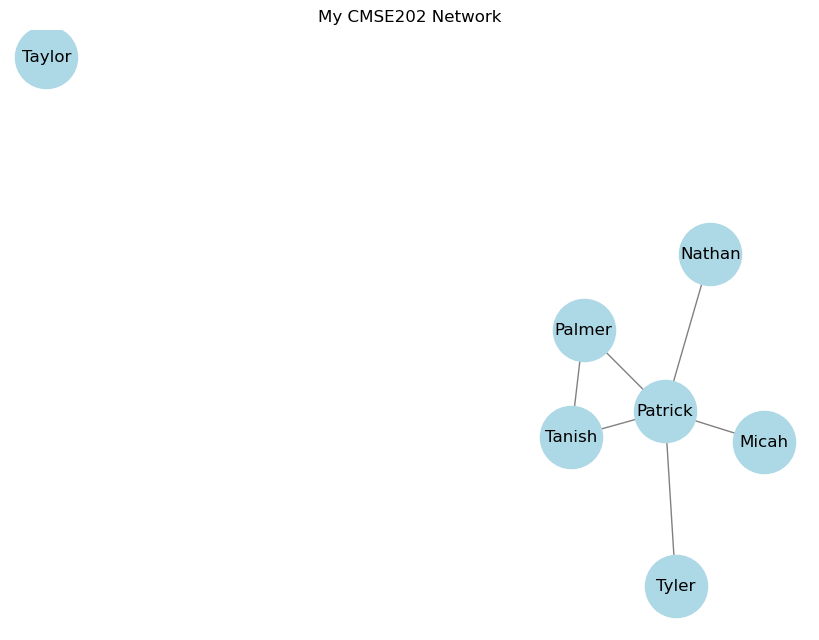

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

people = {
    "Patrick": ["Palmer", "Tanish", "Nathan", "Tyler", "Micah"],
    "Palmer": ["Tanish"],        
    "Taylor": [],
    "Nathan": [],
    "Tyler": [],
    "Micah": [],
}

G = nx.Graph()

for person in people:
    G.add_node(person)

for friend in people["Patrick"]:
    G.add_edge("Patrick", friend)

for person, connections in people.items():
    if person != "Patrick": 
        for connection in connections:
            G.add_edge(person, connection)

plt.figure(figsize=(8,6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
plt.title("My CMSE202 Network")
plt.show()

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 2**", and push the changes to GitHub.


If committing and/or pushing isn't working for you, write down the complete commands in this cell that would have committed your changes (with the commit message) and pushed them to GitHub.

---

<hr style="border:2px solid gray">

## Part 3: Regression Analysis on Data (27 points)

The goal for this part is to do a multivariate linear regression, also known as multiple linear regression, to understand the relation between renting a bike and other factors. You can download the dataset from this URL:

`https://raw.githubusercontent.com/gambre11/CMSE202/refs/heads/main/day.csv`

&#9989; **Question 3.1 (3 points)**: To get started, **download the `day.csv` file and place it in the same directory as your notebook**, then **read in the `day.csv` dataset and name it `bike_data`** and finally **display the first few rows of the data**. You can use `Pandas` for this task or any other Python tool you prefer.

In [37]:
import pandas as pd

bike_new = pd.read_csv("day.csv")

bike_new.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Information for this dataset can be found here: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset/data

You will be trying to predict `cnt` (which is the number of bike rentals) using linear regression with the features.


&#9989; **Question 3.2 (2 points)**: Remove the columns `dteday`, `instant`,`casual`, and `registered` from the data you loaded in.

In [41]:
bike_new = bike_new.drop(columns=["dteday", "instant", "casual", "registered"])

bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


&#9989; Run this following code cell. This is taking some columns and separating the data. You will likely need to change the variable name to match the variable name of your data set though so pay attention to everywhere it mentions `bike_new`.

In [43]:
import warnings
warnings.filterwarnings('ignore')

bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')

bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.replace({False: 0, True: 1}, inplace=True)

&#9989; **Question 3.3 (3 points)**: **Construct two data frames** using the loaded and cleaned data: one named `labels` and the other named `features`. The `labels` data frame should consist solely of the `cnt` column, while the `features` data frame should contain all the other columns. **Display the first few lines of these data frames.** Note the pandas `.pop` method may be helpful here

In [45]:
### Put your code here
labels = bike_new.pop("cnt")

features = bike_new

print("Labels:")
print(labels.head())

print("\nFeatures:")
print(features.head())

Labels:
0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

Features:
   yr  holiday  workingday      temp     atemp       hum  windspeed  season_2  \
0   0        0           0  0.344167  0.363625  0.805833   0.160446         0   
1   0        0           0  0.363478  0.353739  0.696087   0.248539         0   
2   0        0           1  0.196364  0.189405  0.437273   0.248309         0   
3   0        0           1  0.200000  0.212122  0.590435   0.160296         0   
4   0        0           1  0.226957  0.229270  0.436957   0.186900         0   

   season_3  season_4  ...  mnth_11  mnth_12  weekday_1  weekday_2  weekday_3  \
0         0         0  ...        0        0          0          0          0   
1         0         0  ...        0        0          0          0          0   
2         0         0  ...        0        0          1          0          0   
3         0         0  ...        0        0          0          1          0   
4         0    

Next, we will fit the data using the ordinary least squares model `OLS` in `statsmodel`. 

&#9989; **Question 3.4 (2 point)**: Before proceeding, **add a column of constants** (set to 1.0) to the `features` data frame. You learned about a `statsmodels` function in class that can accomplish this task. Label the modified data frame as `features_const`. **Display** `features_const` to verify that the new column is indeed added.

In [47]:
import statsmodels.api as sm

features_const = sm.add_constant(features)

features_const.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1.0,0,0,0,0.344167,0.363625,0.805833,0.160446,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1.0,0,0,0,0.363478,0.353739,0.696087,0.248539,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,0,0,1,0.196364,0.189405,0.437273,0.248309,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,0,0,1,0.200000,0.212122,0.590435,0.160296,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1.0,0,0,1,0.226957,0.229270,0.436957,0.186900,0,0,...,0,0,0,0,1,0,0,0,0,0


Now you will perform the actual fit.

&#9989; **Question 3.5 (4 points)**: Using `statsmodels` `OLS`, **perform a fit** using `labels` (containing `cnt`) as the dependent variable and `features_const` as the independent variable. **Print the fit** using `summary()`.

In [49]:
### Put your code here
model = sm.OLS(labels, features_const)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     140.3
Date:                Thu, 01 May 2025   Prob (F-statistic):          8.67e-266
Time:                        08:10:10   Log-Likelihood:                -5880.2
No. Observations:                 731   AIC:                         1.182e+04
Df Residuals:                     702   BIC:                         1.195e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1485.8439    239.746      6.198      0.000    1015.138    1956.550
yr            2019.7354     58.220     34.691      0.000    1905.429    2134.042
holiday       -258.8454    160.940     -1.608      0.108    -574.827      57.136
workingday     330.8518     66.825      4.951      0.000     199.651     462.053
temp          2855.0107   1398.156      2.042      0.042     109.942    5600.079
atemp         1786.1574   1462.120      1.222      0.222   -1084.494    4656.808
hum          -1535.4684    292.448     -5.250      0.000   -2109.646    -961.290
windspeed    -2823.2967    414.552     -6.810      0.000   -3637.207   -2009.386
season_2       884.7108    179.492      4.929      0.000     532.305    1237.117
season_3       832.7022    213.129      3.907      0.000     414.255    1251.150
season_4      1575.3506    181.001      8.704      0.000    1219.983    1930.718
mnth_2         131.0251    143.776      0.911      0.362    -151.258     413.308
mnth_3         542.8277    165.433      3.281      0.001     218.025     867.630
mnth_4         451.1656    247.567      1.822      0.069     -34.895     937.226
mnth_5         735.5055    267.628      2.748      0.006     210.059    1260.952
mnth_6         515.4048    282.411      1.825      0.068     -39.066    1069.876
mnth_7          30.7966    313.821      0.098      0.922    -585.343     646.937
mnth_8         444.9490    303.165      1.468      0.143    -150.270    1040.168
mnth_9        1004.1728    265.123      3.788      0.000     483.644    1524.701
mnth_10        519.6743    241.554      2.151      0.032      45.420     993.928
mnth_11       -116.6933    230.776     -0.506      0.613    -569.788     336.401
mnth_12        -89.5915    182.214     -0.492      0.623    -447.342     268.159
weekday_1     -118.7980     71.469     -1.662      0.097    -259.116      21.520
weekday_2      -21.3242     77.324     -0.276      0.783    -173.138     130.490
weekday_3       50.5056     77.670      0.650      0.516    -101.988     202.999
weekday_4       55.4911     77.017      0.721      0.471     -95.721     206.703
weekday_5      106.1319     77.308      1.373      0.170     -45.652     257.915
weekday_6      440.4588    106.562      4.133      0.000     231.240     649.678
weathersit_2  -462.5381     77.087     -6.000      0.000    -613.887    -311.190
weathersit_3 -1965.0865    197.052     -9.972      0.000   -2351.968   -1578.205
==============================================================================
Omnibus:                      125.281   Durbin-Watson:                   1.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              347.309
Skew:                          -0.860   Prob(JB):                     3.83e-76
Kurtosis:                       5.906   Cond. No.                     3.85e+15
===============

&#9989; **Question 3.5 (2 points)**: Among all the features, is there one or more that are significantly less important than others? justify your answer with a sentence or two.

<font size=+3>&#9998;</font> Yes. Months: 7, 11, 12 and weekdays: 2, 3, 4 All have significant P-values making them less significant. And may even be able to be removed.

&#9989; **Question 3.6 (3 points)**: **Remove the "least important" features**, then **fit the model again** and **print the fit** using `summary()` again.

In [52]:
import statsmodels.api as sm

columns_to_drop = [
    'mnth_7', 'mnth_11', 'mnth_12',
    'weekday_2', 'weekday_3', 'weekday_4'
]

reduced_features = features.drop(columns=columns_to_drop)

reduced_features_const = sm.add_constant(reduced_features)

reduced_model = sm.OLS(labels, reduced_features_const)
reduced_results = reduced_model.fit()

reduced_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     171.7
Date:                Thu, 01 May 2025   Prob (F-statistic):          4.54e-271
Time:                        08:15:36   Log-Likelihood:                -5880.8
No. Observations:                 731   AIC:                         1.181e+04
Df Residuals:                     707   BIC:                         1.192e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1473.5932    236.506      6.231      0.000    1009.254    1937.932
yr            2017.3883     57.744     34.937      0.000    1904.019    2130.758
holiday       -243.7688    196.466     -1.241      0.215    -629.495     141.957
workingday     356.2125     87.218      4.084      0.000     184.975     527.450
temp          3010.4665   1347.465      2.234      0.026     364.955    5655.978
atemp         1697.9915   1452.207      1.169      0.243   -1153.162    4549.145
hum          -1567.5812    286.052     -5.480      0.000   -2129.194   -1005.968
windspeed    -2854.9060    411.065     -6.945      0.000   -3661.959   -2047.853
season_2       888.6059    164.385      5.406      0.000     565.865    1211.347
season_3       831.8111    169.016      4.922      0.000     499.978    1163.644
season_4      1495.3233    114.643     13.043      0.000    1270.242    1720.405
mnth_2         150.9148    130.400      1.157      0.248    -105.102     406.932
mnth_3         554.7513    132.924      4.173      0.000     293.777     815.725
mnth_4         455.1200    189.233      2.405      0.016      83.594     826.646
mnth_5         730.4264    192.749      3.790      0.000     351.997    1108.856
mnth_6         502.8625    164.186      3.063      0.002     180.513     825.212
mnth_8         433.8053    132.607      3.271      0.001     173.455     694.156
mnth_9        1024.1609    122.627      8.352      0.000     783.405    1264.917
mnth_10        607.1564    126.288      4.808      0.000     359.212     855.101
weekday_1     -144.1679     89.859     -1.604      0.109    -320.591      32.255
weekday_5       77.4302     87.561      0.884      0.377     -94.480     249.341
weekday_6      438.1778    106.208      4.126      0.000     229.656     646.699
weathersit_2  -458.8762     76.436     -6.003      0.000    -608.944    -308.808
weathersit_3 -1960.3725    196.086     -9.998      0.000   -2345.353   -1575.392
==============================================================================
Omnibus:                      126.140   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.914
Skew:                          -0.864   Prob(JB):                     6.31e-77
Kurtosis:                       5.921   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989; **Question 3.7 (3 points)**: Discuss the difference in fit quality between the two fits. Did the second fit (with "least important" feature removed) outperform or underperform compared to the other? Describe how you evaluated the quality based on the fit statistics.

<font size=+3>&#9998;</font> The second model is definitely preferred since it simplifies the regression. R^2 was slightly increased, and AIC and BIC both decreased.

&#9989; **Question 3.8 (5 points)**: What does this all mean? What is your best R-squared value or adjusted R-squared value? What can we say about the data and how it might be related? What does it mean when people say that correlation is not causation? Please try to answer these questions the best that you can in a paragraph. 

<font size=+3>&#9998;</font> The best R^2 value was 0.843, which is a good R^2 value. This means that 84.3% of the variance can be explained by the features shown in the model. Correlatoin is not causation means that just because 2 

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", and push the changes to GitHub.


If committing and/or pushing isn't working for you, write down the complete commands in this cell that would have committed your changes (with the commit message) and pushed them to GitHub.

---

<hr style="border:2px solid gray">

## Part 4: Support vector machine (SVM) classification (34 points)

In this part of the exam, we will use a support vector machine (SVM) classifier to identify emails as spam or not based on various email features. We will be using the UC Irvine Machine Learning Repository Spambase Dataset. More info about this dataset can be found here https://archive.ics.uci.edu/dataset/94/spambase. 

To get started, download the `spambasedata.csv` file from the link below (or D2L) and place it in the same directory as your notebook. 

`https://raw.githubusercontent.com/gambre11/CMSE202/refs/heads/main/spambasedata.csv`

&#9989; **Question 4.1 (2 points)**: Read in the `spambase.csv` dataset into a `Pandas` `DataFrame` and display the first few rows. 

In [ ]:
### Put your code for Question 4.1 here

&#9989; **Question 4.2 (2 points)**: The following cell contains a list with the names of every column in this dataset. Add these column names to your data that you have read in, and display your data again. Double check and make sure you are not losing any data when doing this.

In [ ]:
column_names = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", 
                      "capital_run_length_longest", "capital_run_length_total", "spam"]

&#9989; **Question 4.3 (2 points)**: How many rows of data are there? How many emails are marked as spam and what is this percentage compared to the entire dataset?

In [ ]:
### Put your work and answer to Question 4.3 here

&#9989; **Question 4.4 (2 points)**: Our goal is to classify the `spam` of the email given the other 57 features. Create a variable with all of the columns of the `DataFrame` except for `spam`,  and another variable with just the `spam` column of the `DataFrame`.

In [ ]:
### Put your code for Question 4.4 here

Now that the data is properly loaded into Python, we need to perform a **train-test-split** so that we can build our SVM classifier and test it.

&#9989; **Question 4.5 (4 points)**: Use the `train_test_split()` method from `sklearn.model_selection` like we did in class. Use a `train_size` of `0.78` and `random_state` of `1616`. You should now have training features, testing features, training labels, and testing labels. Finally, **print the shape of your training features, training labels, testing features, and testing labels** to verify that your train-test-split did what it was supposed to.

In [ ]:
### Put your code for Question 4.5 here

&#9989; **Question 4.6 (6 points)**: Fit an SVM classifier (using the `sklearn` `SVC` class) to the dataset. Use a `linear` kernel and set the hyper-parameter to be `C=0.001.` Then **fit the SVM using your training set** and use the resulting SVM to **predict the labels for the testing set** so you get predicted labels for the testing set. Finally, **print the fit statistics** using the `confusion_matrix()` and `classification_report()` methods.

In [ ]:
### Put your code for Question 4.6 here

&#9989; **Question 4.7 (2 points)**: Create two more SVM classifiers and test them by repeating your work from Question 4.6, but this time set the hyper-parameters to be `C=0.01.` and `C=0.1.` Again, **print the fit statistics** using the `confusion_matrix()` and `classification_report()` methods. Note that this might take 30 seconds to a minute to run. If it takes longer than 2 minutes, flag an instructor for help. 

In [ ]:
### Put your code for Question 4.7 here

&#9989; **Question 4.8 (6 points)**: Interpret the outputs of your classification reports and the confusion matrices. In particular: 

* From your classification report, talk about what the **precision**, **recall**, and **f1-score** mean in this context. Do not just give definitions.

* From your confusion matrix, what do each of the four numbers represent in this context. Again do not give a broad definition.

* How does your accuracy change as C changes? Why does this happen? What is the parameter C and what does increasing or decreasing its value represent when classifying data using SVM?

<font size=+3>&#9998;</font> **Do This - Erase the contents of this cell an put your answer here.**

---

&#9989; **Question 4.9 (1 point)**: Suppose we wanted to try fitting a Support Vector Classifier for multiple choices of the kernel function and multiple choices for the values of the hyperparameter(s) (instead of just using a `linear` kernel with one value of `C`). We could write code with nested for loops to repeat the procedure with every combination of kernel function and hyperparameter value(s) we wanted to try. Name a method built into sklearn that will do this automatically. (We used this on an in-class assignment).

<font size=+3>&#9998;</font> **Do This - Erase the contents of this cell an put your answer here.**



&#9989; **Question 4.10 (1 point)**: When filtering out spam emails, we want to minimize filtering out emails that may be important. What could we do to prioritize this? 

<font size=+3>&#9998;</font> **Do This - Erase the contents of this cell an put your answer here.**

&#9989; **Question 4.11 (3 points)**: Both of the images below show the same two-dimensional dataset with two classes (solid blue squares and unfilled red circles) along with the decision boundary of a linear classifier. One classifier was generated via the Perceptron Learning Algorithm, and the other used a Support Vector Classifier. Which one is which? **Justify your answer!**

Classifier A          | | Classifier B
:-------------------------:|:---:|:-------------------------:
![](https://i.ibb.co/R2BBsDC/Datapoints1-A.png)  | |  ![](https://i.ibb.co/mb9vcq4/Datapoints1-B.png)

<font size=+3>&#9998;</font> **Do This - Erase the contents of this cell an put your answer here.**

&#9989; **Question 4.12 (3 points)**: Both of the images below show the same two-dimensional dataset with two classes (solid blue squares and unfilled red circles) along with the decision boundary of a linear Support Vector Classifier. One used the hyperparameter `C = 0.1`, and the other used the hyperparameter `C = 1000`. Which one is which? **Justify your answer!**

Classifier X          | | Classifier Y
:-------------------------:|:---:|:-------------------------:
![](https://i.ibb.co/7pPCRwh/Datapoints2-A.png)  | |  ![](https://i.ibb.co/LSMBXzd/Datapoints2-B.png)

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 4**", and push the changes to GitHub.


If committing and/or pushing isn't working for you, write down the complete commands in this cell that would have committed your changes (with the commit message) and pushed them to GitHub.

---

<hr style="border:2px solid gray">

## Part 5: Principal Component Analysis (5 points)

&#9989; **Question 5 (5 points)**: What was the point of doing Principal Component Analysis on our face data from our day 23 ICA? What does Principal Component Analysis help us do? 

<font size=+3>&#9998;</font> **Do This - Erase the contents of this cell an put your answer here.**

## You're done! Congrats on finishing your CMSE 202 Final!

Make sure all of your changes to your repository are committed and pushed to GitHub (or that you wrote down the commands that would have done that after each part). Also upload a copy of this notebook to the dropbox on D2L in case something went wrong with your repository or if you couldn't get the repository to work.